In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45, odeint
import gsw

$$
\begin{align}
\frac{Dk}{Dt} = - \frac{\partial \omega}{\partial x} = -\frac{1}{2}V_{xx} - \frac{1}{2}V_{zz}\frac{k^2}{m^2} + \frac{1}{2}V_{xz}\frac{k}{m}
% \frac{Dm}{Dt} = - \frac{\partial \omega}{\partial z} = -\frac{1}{2}V_{xz} - \frac{1}{2f}N^2_z\frac{k^2}{m^2} + \frac{1}{2}V_{zz}\frac{k}{m}
\end{align}
$$
$$
\begin{align}
% \frac{Dk}{Dt} = - \frac{\partial \omega}{\partial x} = -\frac{1}{2}V_{xx} - \frac{1}{2}V_{zz}\frac{k^2}{m^2} + \frac{1}{2}V_{xz}\frac{k}{m}
\frac{Dm}{Dt} = - \frac{\partial \omega}{\partial z} = -\frac{1}{2}V_{xz} - \frac{1}{2f}N^2_z\frac{k^2}{m^2} + \frac{1}{2}V_{zz}\frac{k}{m}
\end{align}
$$

$$
\begin{align}
\frac{Dx}{Dt} = c_{g_x}, \frac{Dz}{Dt} = c_{g_z} 
\end{align}
$$

In [2]:
x = np.linspace(0,200000,500)
z= np.linspace(-200,0, 500)

In [3]:
def N2(z):
    return z*1e-6
def V(x,z):
    return np.sin(x*np.pi/100000)*np.exp(z/100)
def Vx(x,z):
    return np.cos(x*np.pi/100000)*np.exp(z/100)*np.pi/100000
def Vxz(x,z):
    return np.cos(x*np.pi/100000)*np.exp(z/100)*np.pi/100000/100
def Vxx(x,z):
    return -np.sin(x*np.pi/100000)*np.exp(z/100)*np.pi*np.pi/100000/100000
def Vz(x,z):
    return np.sin(x*np.pi/100000)*np.exp(z/100)/100
def Vzz(x,z):
    return np.sin(x*np.pi/100000)*np.exp(z/100)/100/100

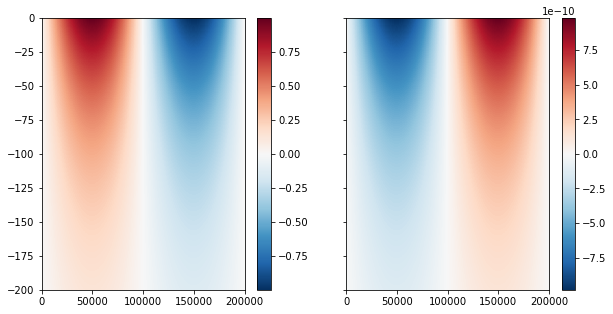

In [4]:
fig,ax = plt.subplots(1,2, figsize=(10,5),sharey=True)
h = ax[0].pcolormesh(x,z, V(x,z[:,None]), cmap='RdBu_r')
plt.colorbar(h,ax=ax[0])

h = ax[1].pcolormesh(x,z, Vxx(x,z[:,None]), cmap='RdBu_r')
plt.colorbar(h,ax=ax[1])

In [12]:
def ode_sys(w,t):
    k,m,x,z = w
    f= gsw.f(40)
#     print(Vxx(x,z),Vzz(x,z),Vxz(x,z))
    dkdt = -0.5*Vxx(x,z) -0.5*Vzz(x,z)*k**2/m**2 +0.5*Vxz(x,z)*k/m
    dmdt = -0.5*Vxz(x,z) +0.5*Vzz(x,z)*k/m #-0.5*N2z(z)*k**2/m**2/f 
    dxdt = N2(z)*k/m**2/f - 2*Vz(x,z)/m
    dzdt = -N2(z)*k**2/m**3/f + 2*Vz(x,z)*k/m**2
    return [dkdt,dmdt,dxdt,dzdt]

In [13]:
numpoints = 60*24
dt = 60

t = [i*dt for i in range(numpoints)]

k0=  -2*np.pi/100000
m0 = -2*np.pi/700
x0= 0
z0= 0

# check frequency

w0 = [k0,m0,x0,z0]
wsol = odeint(ode_sys, w0, t,)

In [14]:
k0/m0, 0.5*gsw.f(40)/np.sqrt(N2(10))

(0.007, 0.04687281170409358)

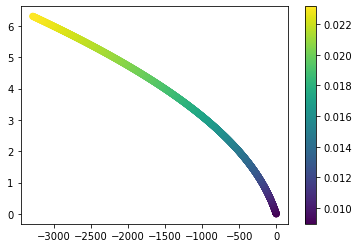

In [15]:
plt.scatter(wsol[:,2],wsol[:,3],c=np.abs(wsol[:,1]),cmap='viridis')
plt.colorbar()

(0.0, 200000.0)

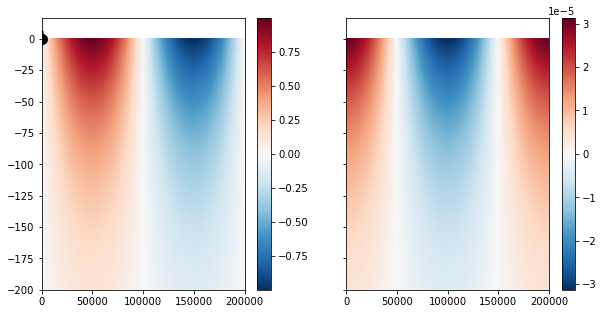

In [16]:
fig,ax = plt.subplots(1,2, figsize=(10,5),sharey=True)
h = ax[0].pcolormesh(x,z, V(x,z[:,None]), cmap='RdBu_r')
ax[0].plot(x0,z0, markersize=10,marker='o', color='k')
ax[0].scatter(wsol[:,2],wsol[:,3],c=wsol[:,1],cmap='RdBu_r')
plt.colorbar(h,ax=ax[0])
# ax[0].set_ylim(-1,0)
ax[0].set_xlim(0,2e5)

h = ax[1].pcolormesh(x,z, Vx(x,z[:,None]), cmap='RdBu_r')
plt.colorbar(h,ax=ax[1])
# ax[1].set_ylim(-100,0)
ax[1].set_xlim(0,2e5)

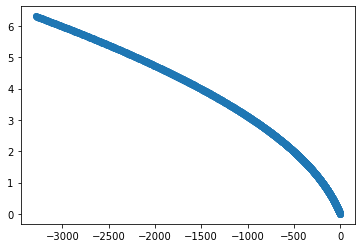

In [10]:
plt.plot(wsol[:,2],wsol[:,3],'o')

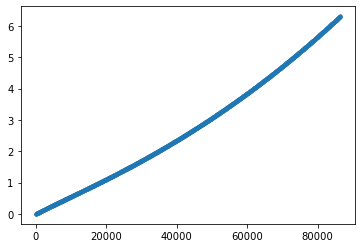

In [11]:
# plt.plot(t,wsol[:,2])
plt.plot(t,wsol[:,3],'.')

In [890]:
7*0.15*60*60*24/1000

90.72

In [888]:
35*111000/(14*30)/24/60/60

0.10706018518518519

In [892]:
100/(5*1.852)

10.799136069114471